## Descriptive Analytics and Data Preprocessing on Sales & Discounts Dataset

### Introduction
The goal of this analysis is to perform descriptive analytics, visualize data distributions, and preprocess the dataset for further analysis. We will compute basic statistical measures, visualize distributions, and apply preprocessing techniques such as standardization and one-hot encoding.


In [1]:
import pandas as pd

# Load the dataset
df = pd.read_csv('sales_data_with_discounts.csv')

# Display the first few rows of the dataset
df.head()

,Date,Day,SKU,City,Volume,BU,Brand,Model,Avg Price,Total Sales Value,Discount Rate (%),Discount Amount,Net Sales Value
0,01-04-2021,Thursday,M01,C,15,Mobiles,RealU,RU-10,12100,181500,11.654820,21153.498820,160346.501180
1,01-04-2021,Thursday,M02,C,10,Mobiles,RealU,RU-9 Plus,10100,101000,11.560498,11676.102961,89323.897039
2,01-04-2021,Thursday,M03,C,7,Mobiles,YouM,YM-99,16100,112700,9.456886,10657.910157,102042.089843
3,01-04-2021,Thursday,M04,C,6,Mobiles,YouM,YM-99 Plus,20100,120600,6.935385,8364.074702,112235.925298
4,01-04-2021,Thursday,M05,C,3,Mobiles,YouM,YM-98,8100,24300,17.995663,4372.946230,19927.053770


In [3]:
# Identify numerical columns
numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns

# Calculate mean, median, mode, and standard deviation
statistics = {}
for col in numerical_columns:
    stats = {
        'mean': df[col].mean(),
        'median': df[col].median(),
        'mode': df[col].mode()[0],
        'std_dev': df[col].std()
    }
    statistics[col] = stats

statistics

{'Volume': {'mean': 5.066666666666666,
  'median': 4.0,
  'mode': 3,
  'std_dev': 4.231602391213926},
 'Avg Price': {'mean': 10453.433333333332,
  'median': 1450.0,
  'mode': 400,
  'std_dev': 18079.90483993645},
 'Total Sales Value': {'mean': 33812.83555555555,
  'median': 5700.0,
  'mode': 24300,
  'std_dev': 50535.07417255328},
 'Discount Rate (%)': {'mean': 15.155241895330914,
  'median': 16.57776564929597,
  'mode': 5.007822189204133,
  'std_dev': 4.220602153325511},
 'Discount Amount': {'mean': 3346.499424342415,
  'median': 988.9337332382784,
  'mode': 69.17794228822787,
  'std_dev': 4509.9029633539985},
 'Net Sales Value': {'mean': 30466.336131270138,
  'median': 4677.788059301853,
  'mode': 326.97480055470817,
  'std_dev': 46358.656624066934}}

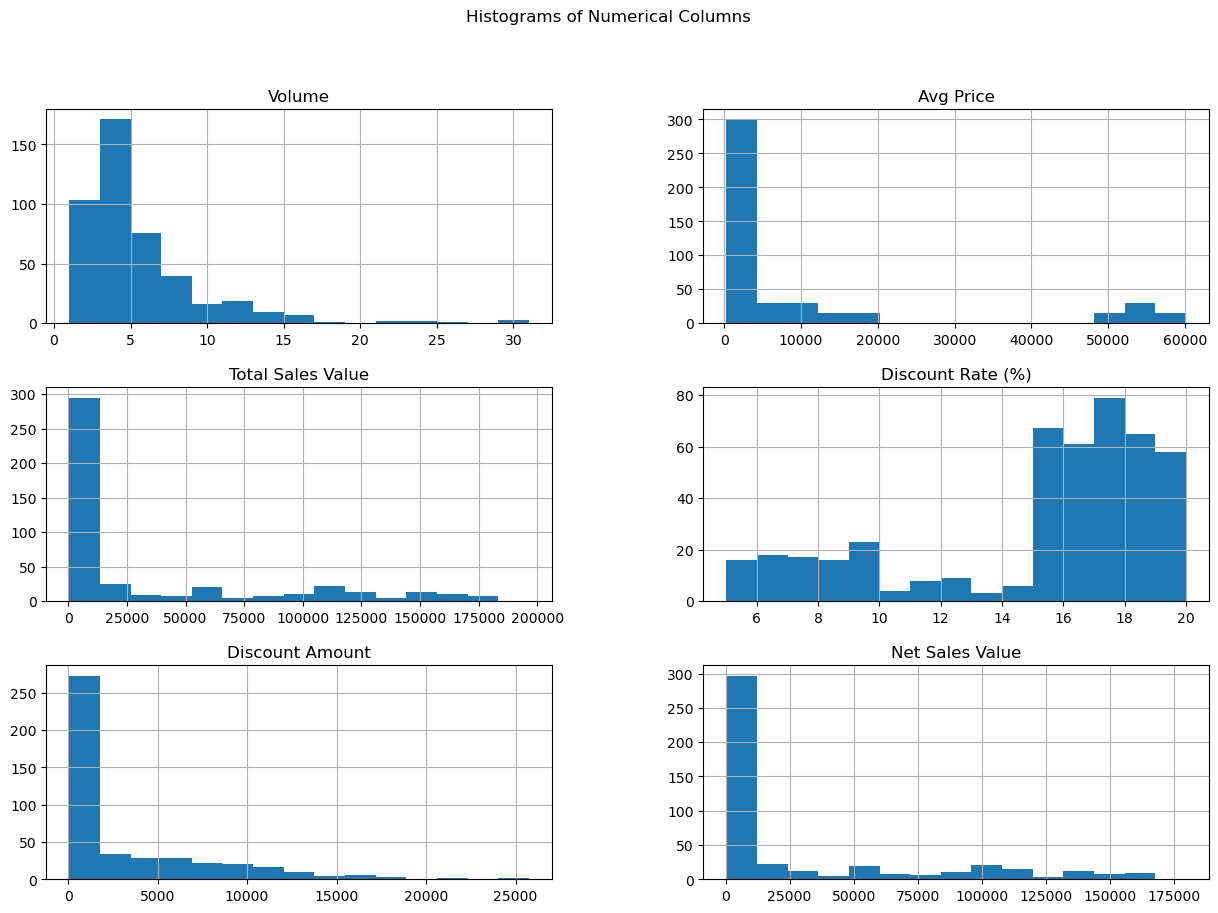

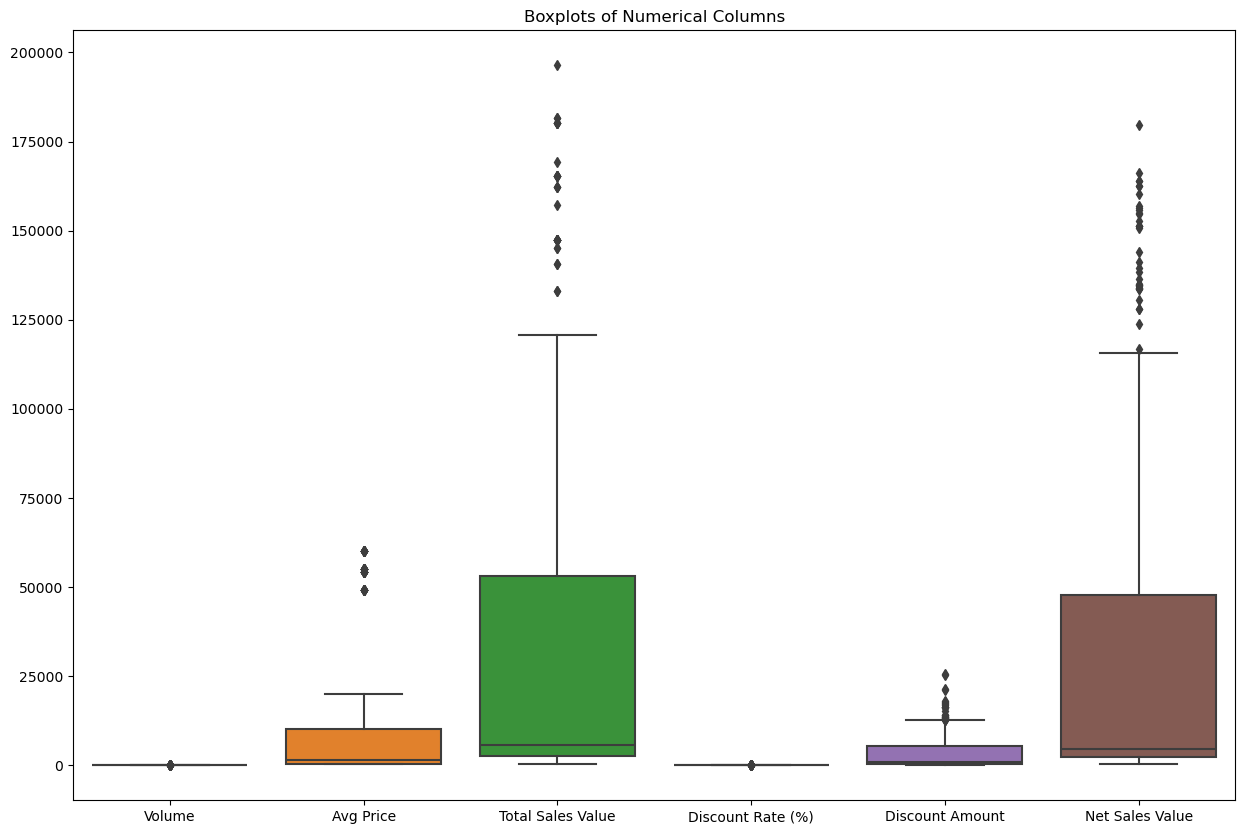

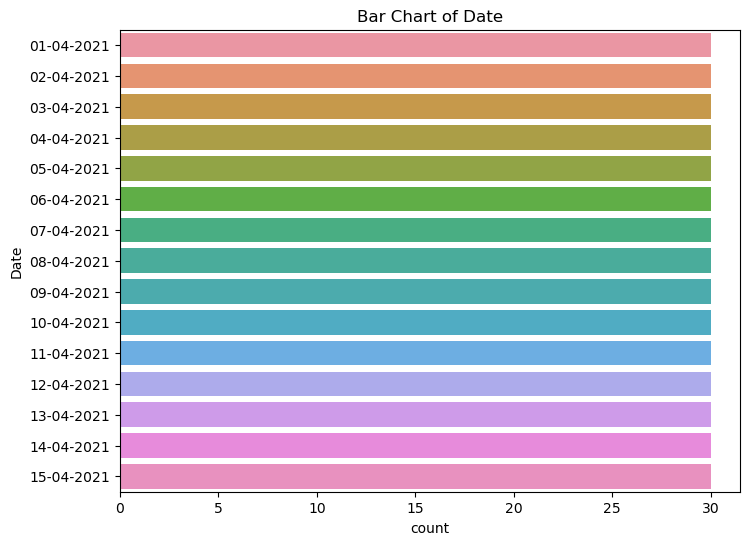

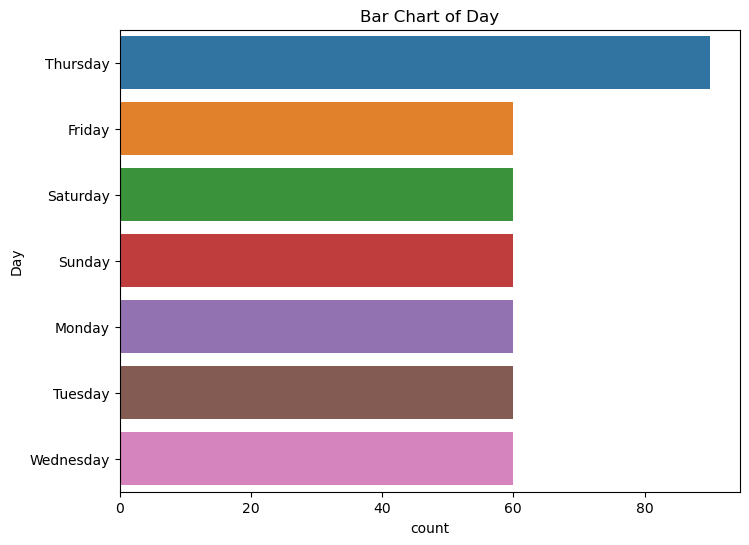

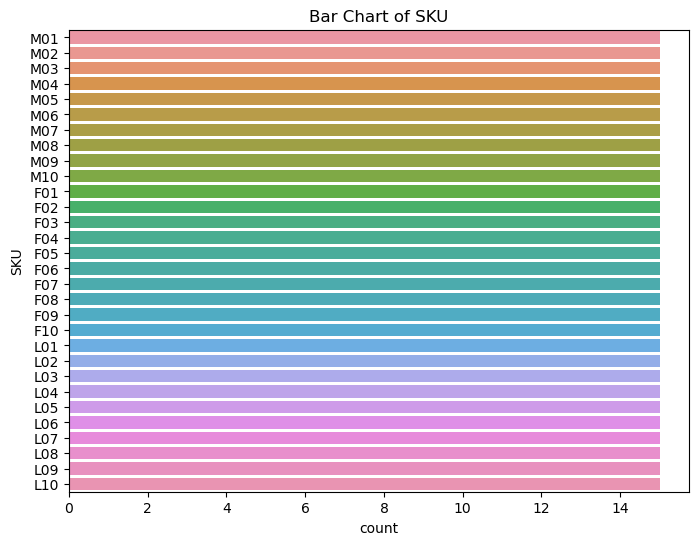

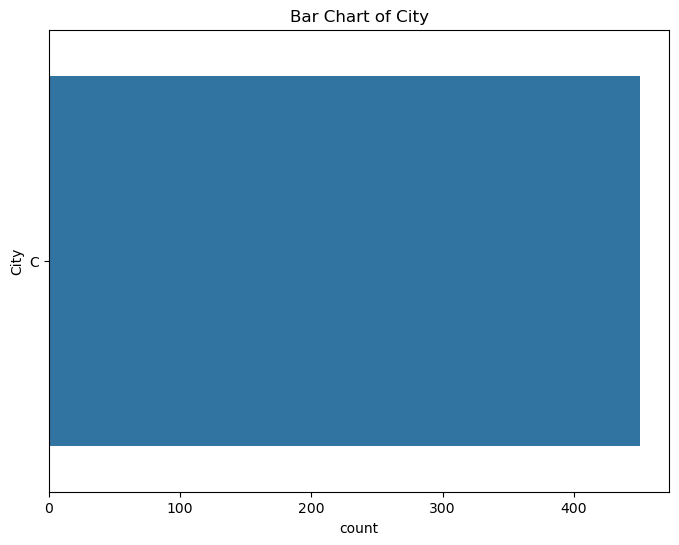

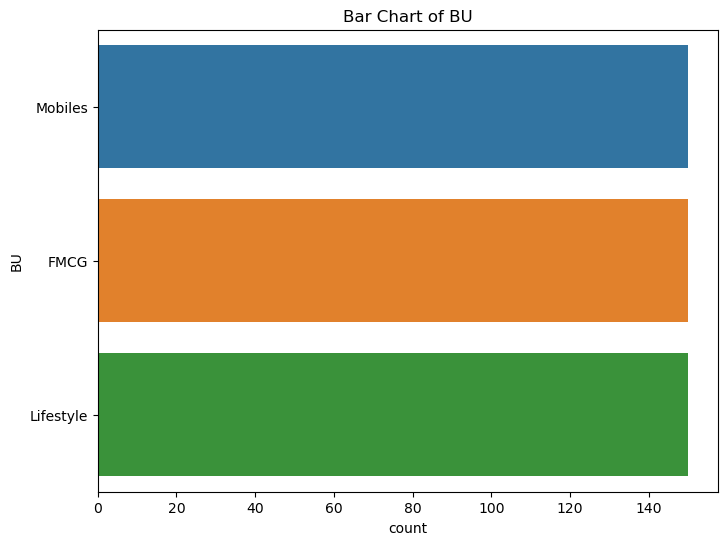

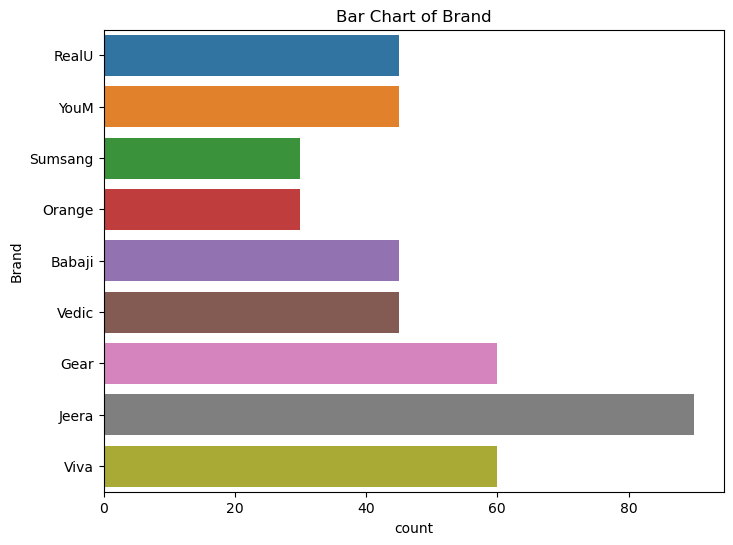

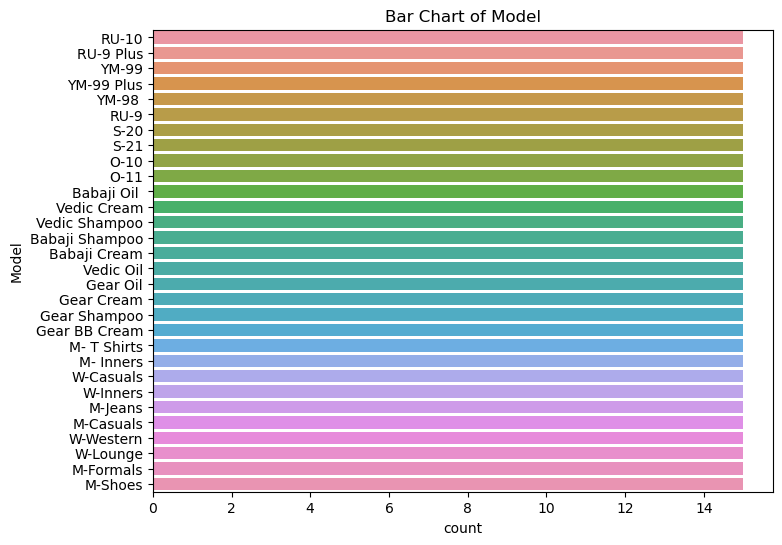

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

# Histograms for numerical columns
df[numerical_columns].hist(bins=15, figsize=(15, 10))
plt.suptitle('Histograms of Numerical Columns')
plt.show()

# Boxplots for numerical columns
plt.figure(figsize=(15, 10))
sns.boxplot(data=df[numerical_columns], orient='v')
plt.title('Boxplots of Numerical Columns')
plt.show()

# Bar charts for categorical columns
categorical_columns = df.select_dtypes(include=['object']).columns

for col in categorical_columns:
    plt.figure(figsize=(8, 6))
    sns.countplot(y=df[col], orient='v')
    plt.title(f'Bar Chart of {col}')
    plt.show()


In [5]:
from sklearn.preprocessing import StandardScaler

# Standardization using z-score normalization
scaler = StandardScaler()
df_standardized = df.copy()
df_standardized[numerical_columns] = scaler.fit_transform(df[numerical_columns])

# Show before and after standardization
before_after = pd.DataFrame({
    'Before': df[numerical_columns].mean(),
    'After': df_standardized[numerical_columns].mean()
})
before_after

,Before,After
Volume,5.066667,6.118562e-17
Avg Price,10453.433333,3.157968e-17
Total Sales Value,33812.835556,1.578984e-17
Discount Rate (%),15.155242,-3.552714e-17
Discount Amount,3346.499424,-5.526444e-17
Net Sales Value,30466.336131,1.973730e-17


In [6]:
# One-hot encoding for categorical columns
df_encoded = pd.get_dummies(df_standardized, columns=categorical_columns)

# Display a portion of the transformed dataset
df_encoded.head()

,Volume,Avg Price,Total Sales Value,Discount Rate (%),Discount Amount,Net Sales Value,Date_01-04-2021,Date_02-04-2021,Date_03-04-2021,Date_04-04-2021,...,Model_Vedic Cream,Model_Vedic Oil,Model_Vedic Shampoo,Model_W-Casuals,Model_W-Inners,Model_W-Lounge,Model_W-Western,Model_YM-98,Model_YM-99,Model_YM-99 Plus
0,2.350029,0.091173,2.925721,-0.830289,3.952816,2.804756,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,1.167129,-0.019570,1.330995,-0.852661,1.849014,1.271026,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,0.457388,0.312659,1.562775,-1.351631,1.622995,1.545675,True,False,False,False,...,False,False,False,False,False,False,False,False,True,False
3,0.220808,0.534146,1.719276,-1.949723,1.113807,1.765810,True,False,False,False,...,False,False,False,False,False,False,False,False,False,True
4,-0.488932,-0.130313,-0.188452,0.673739,0.227852,-0.227595,True,False,False,False,...,False,False,False,False,False,False,False,True,False,False


### Conclusion
In this notebook, we performed descriptive analytics on a sales and discounts dataset, visualized the distribution of variables, standardized numerical columns, and transformed categorical variables using one-hot encoding. These preprocessing steps are crucial for preparing the data for further analysis and machine learning models.
